# DS 13. 디양한 평가지표, fashion_mnist(Flatten, Maxpooling layer 이용)

> "작성완료"

- toc: true
- branch: master
- badges: true
- comments: true
- [python, Data Science]

---
# Data Science
- lenture: Data Science_10-2nd week of lectures.
- lenture date: 2022-05-09
- lecturer: Guebin choi
- study date: 2022-05-10
- author: Kione kim
---

In [2]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [3]:
tnp.experimental_enable_numpy_behavior()

In [4]:
import matplotlib.pyplot as plt

## 평가지표

### 다양한 평가지표

`-` 여러가지 평가지표들: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
- 이걸 다 암기하는건 불가능. 
- 몇 개만 뽑아서 암기하고 왜 쓰는지 생각해보고 넘어가자!

#### confusion matrix의 이해 

`-` 표1

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP|FN|
|안나감(실제)| FP| TN|

`-` 표2 (교수님 정리) 

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|$(y,\hat{y})= $ (O,O)|$(y,\hat{y})= $(O,X)|
|안나감(실제)| $(y,\hat{y})= $(X,O)| $(y,\hat{y})= $(X,X)|

`-` 표3 (교수님 정리) 

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP, $\# O/O$ |FN, $\#O/X$|
|안나감(실제)| FP, $\#X/O$| TN, $\#X/X$|

- 암기법: (1) 두 번째 글자를 그대로 쓴다 (2) 첫글자가 T이면 분류 성공, 첫글자가 F이면 분류 실패

`-` 표4 (위키 참고) 

| |퇴사(예측)|안나감(예측)| |
|:-:|:-:|:-:|:-:|
|퇴사(실제)| TP, $\# O/O$ |FN, $\# O/X$| Sensitivity(민감도)=Recall(재현율)=$\frac{TP}{TP+FN}$=$\frac{\#O/O}{\# O/O+ \#O/X}$|
|안나감(실제)| FP, $\# X/O$| TN, $\# X/X$| |
| |Precision(프리시즌)=$\frac{TP}{TP+FP}$=$\frac{\# O/O}{\# O/O+\# X/O}$| |Accuracy(애큐러시)=$\frac{TP+TN}{total}$=$\frac{\#O/O+\# X/X}{total}$|

### 상황극 

`-` 연구원 A가 입사하여 "퇴사자 예측시스템"의 개발에 들어갔다. 

`-` 대부분의 사람이 퇴사하지 않고 회사에 잘 다닌다고 하자. 즉 1000명이 있으면 10명정도 퇴사한다고 하자,

#### 평가지표 1: Accuracy

`-` 정의: Accuracy(애큐러시)=$\frac{TP+TN}{total}$=$\frac{\#O/O+ \#X/X}{total}$
- 한국어로 정확도, 정분류율이라고 한다. 
- 한국어보다 영어로 외우는게 좋다. (한국어 헷갈림 + Keras에서 옵션도 영어로 넣기 때문) 

`-` 상확극 시점1: `accuracy`로는 불충분한가?
- 회사: 퇴사자 예측프로그램 개발해
- 연구원 A: 귀찮은데 다 안나간다고 하자! -> accuracy가 99% 이니까! 

: 모델에 사용한 파라메터 = 0. 애큐러시 = 99! 학습할 파라메터 수가 적음에도 애큐러시가 굉장히 높음 ! 이거 엄청 좋은 모형이다? 


#### 평가지표2: Sensitivity(민감도), Recall(재현율), True Positive Rate(TPR)

`-` 정의: Sensitivity(민감도)=Recall(재현율)=$\frac{TP}{TP+FN}$=$\frac{\# O/O}{\# O/O+\# O/X}$
- 분모: 실제 O인 관측치 수
- 분자: 실제 O를 O라고 예측한 관측치 수 

뜻: 실제 O를 O라고 예측한 비율

`-` 상황극 적용:
- 분모: 실제 나간 사람들의 수
- 분자: 실제 나간 사람들 중 내가 나갈 것이라고 예측한 관측치 수

뜻: 실제 나간 사람들이 나갈 것이라고 예측에 성공한 비율

`-` 상황극 시점2: `recall`의 필요성
- 인사팀: 실제 퇴사자를 퇴사자로 예측해야 의미가 있음! 우리는 퇴사할것 같은 10명을 찍어달란 의미였음! 
- 연구원 A: 가볍고(=파라메터 적고) 잘 맞추는 모형을 만들어 달라는 거 아니였나요?!

- 인사팀: (고민중..) 생각해보니 이 경우에서 애큐러시는 의미가 없네. 실제 나간 사람 중 연구원이 나간다고 한 사람이 몇 명인지 카운트 하는게 더 의미가 있겠다. 우리는 앞으로 리컬(혹은 민감도)를 보겠다! 

예시1: 실제로 퇴사한 10명중 연구원 A가 퇴사한다고 예측한 사람이 5명이면 리컬이 50%이다.

예시2: 연구원 A가 아무도 나가지 않는다고 예측한 경우, 실제 퇴사한 10명중에서 연구원 A가 퇴사한다고 예측한 사람은 0명이므로 이 경우 리컬 0%이다.

- 결론: 우리(인사팀)가 필요한건 recall이니 앞으로 recall을 가져와주세요! accuracy는 큰 의미없어요. 그래도 명색이 모델이니 accuracy는 90은 넘었으면 좋겠네요!

#### 평가지표3: Precision

`-` 정의: Precision(프리시즌)=$\frac{TP}{TP+FP}$=$\frac{\# O/O}{\# O/O+\# X/O}$
- 분모: O라고 예측한 관측치
- 분자: O라고 예측한 관측치 중 진짜 O인 관측치 

뜻: O라고 예측한 관측치 중 진짜 O인 비율

`-` 상황극 적용:
- 분모: 퇴사할 것이라고 예측한 관측치 수
- 분자: 퇴사할 것이라고 예측한 관측치 중 실제 퇴사한 관측치 수

뜻: 퇴사할 것이라고 예측한 관측치 중 실제 퇴사한 관측치의 비율

`-` 상황극 시점3: `recall`만으로 불충분한 이유, `percision`의 필요성

- 연구원 A: (에휴..) 귀찮은데 그냥 조금만 수틀리면 다 나갈것 같다고 해야겠다 -> 100 명이 나간다고 했음 -> 실제로 연구원 A가 찍은 100명중 10명이 다 나감!

이 경우 애큐러시는 91%, 리컬은 100% (퇴사자 10명을 모두 맞췄으므로) 

- 인사팀: (화가 많이 남) 멀쩡한 사람까지 다 퇴사할 것 같다고 하면 어떡해요? 연구원 A가 나간다고 한 100명 중에 실제로 10명만 나갔어요. 

- 인사팀: 마치 총으로 과녁 중앙에 맞춰 달라고 했더니 기관총을 가져와서 한번 긁은것이랑 뭐가 달라요? 맞추는게 문제가 아니고 `precision`이 너무 낮아요. 

- 연구원 A: accuracy가 90% 이상, recall은 높을수록 좋은 모형을 만들어달라고 하셨잖아요 !

- 인사팀: (고민중..) 앞으로 recall과 함께 precision도 같이 제출하세요. precision은 당신이 나간다고 한 사람중에 실제 나간사람의 비율을 의미해요. 이 경우는 $\frac{10}{100}$이니까 precision이 10%입니다. (속마음: recall 올리겠다고 무작정 너무 많이 예측하지 말란 말이야!) 

#### 평가지표 4: F1 score 

`-` 정의: recall과 precision의 조화평균 

`-` 상황극 시점4: recall, precision을 모두 고려 

- 연구원 A: recall/precision을 같이 내는건 좋은데요, 둘은 `trade off`의 관계에 있습니다. 물론 둘 다 올리는 모형이 있다면 좋지만 그게 쉽지 않아요. 보통은 precision을 올리려면 recall이 희생되는 면이 있고요, recall을 올리려고 하면 precision이 다소 떨어집니다. 즉 반비례 관계에 있어요!

- 연구원 A: 평가기준이 애매하다는 의미입니다. 모형1,2가 있는데 모형1은 모형2보다 precision이 약간 좋고 대신 recall이 떨어진다면 모형1이 좋은 것입니까? 아니면 모형2가 좋은 것입니까? 

- 인사팀: 그렇다면 둘을 평균내서 `F1score`를 계산해서 제출해주세요. 

#### 평가지표 5: Specificity(특이도), False Positive Rate(FPR) 

`-` 정의: 

1. Specificity(특이도)=$\frac{TN}{FP+TN}$=$\frac{\# X/X}{\# X/O+\# X/X}$

2. False Positive Rate (FPR) = 1-Specificity(특이도) = $\frac{FP}{FP+TN}$=$\frac{\# X/O}{\# X/O+\# X/X}$

`-` 상황극 적용:
1. Specificity(특이도)
- 분모: 실제로 퇴사하지 않은 사람들의 수
- 분자: 실제로 퇴사하지 않은 사람들 중 내가 퇴사하지 않을 것이라고 예측한 사람들의 수

뜻: 실제로 퇴사하지 않은 사람들 중 내가 퇴사하지 않을 것이라고 예측한 비율

2. FPR
- 분모: 실제로 퇴사하지 않은 사람들의 수
- 분자: 실제로 퇴사하지 않은 사람들 중 내가 퇴사할 것이라고 예측한 사람들의 수

뜻: 실제로 퇴사하지 않은 사람들 중 내가 퇴사할 것이라고 잘못 예측한 비율(오해한 비율)

`-` 의미: **FPR = 오해해서 미안해, recall(=TPR)을 올리려고 보니 어쩔 수 없었어**
- specificity는 퇴사하지 않은 사람을 퇴사하지 않을 것이라고 찾아낸 비율인데, 이는 별로 중요하지 않다. 
- FPR은 recall을 올리기 위해서 `실제로는 회사 잘 다니고 있는 사람 중 연구원 A가 나갈 것 같다고 예측한 사람들`의 비율이다. 

즉 오해한 비율, 오해해서 미안한 사람의 비율

#### ROC curve 

`-` 정의: $x$축=`FPR`, $y$축=`TPR(recall)` 을 그린 커브 

`-` 의미: 
- 결국 "FPR(오해 비율) vs recall"을 그린 곡선이 ROC커브이다. 
- 생각해보면 오해하는 사람이 많을수록 당연히 recall은 올라간다. 따라서 우상향하는 곡선이다. 
- 오해한 사람이 매우 적은데 recall이 우수하면 매우 좋은 모형이다. 그래서 초반부터 ROC값이 급격하게 올라가면 좋은 모형이다. 

## fashion_mnist

`-` 데이터

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

- 색상 이미지의 경우 차원은 가로 × 세로 × 3 이다.
- 따라서 이 이미지의 차원 (28,28)는 흑백이미지를 뜻한다.

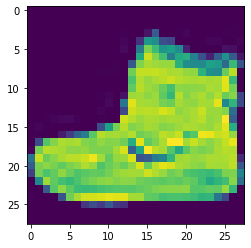

In [7]:
plt.imshow(x_train[0]) 

- 컬러 이미지 처럼 보이지만, 흑백 이미지이다. 
- 밝을수록 노란색, 어두울수록 남색으로 표현한 것이다. (colormap이 viridis일 뿐임)

`-` 확장형태

: 일반적으로 분석할 이미지는 칼라이미지가 많을 것이므로 아래와 같이 자료형을 정리하는 것이 좋다. 이는 일반적인 이미지 자료를 분석하는 정석적인 처리방법이다. 

In [8]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 분석할 이미지는 흑백이미지이므로 채널을 1로 설정해주는 것이 좋다.

In [9]:
X.shape, XX.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

- keras에서 이미지 자료의 형태는 (관측치수,픽셀,픽셀,채널)이다. 

- 이미지 자료를 위와 같이 설정해주면 모든 이미지 자료를 분석할 수 있지 않을까?
- 그런데, dnn에 넣고 분석하려면 shape을 결국 바꿔주어야 한다. 
- 이를 안 하는 방법이 없을까? -> `Flatten()`

### X의 차원이 (관측치수,픽셀,픽셀,채널)일 경우 DNN 쓰기 

#### 예제1: X -> Dense(30,relu) -> Dense(10,softmax):=> y 

`-` 이러한 아키텍처를 통해 분석하기 위해서는 X의 shape을 미리 바꿔야 했었다. 바꾸지 않고 분석하는 방법은 없을까? -> `tf.keras.layers.Flatten()`

In [9]:
flttn = tf.keras.layers.Flatten()

In [10]:
set(dir(flttn)) & {'__call__'}

{'__call__'}

- 함수 또는 클래스임 -> ( ) 사용 가능!

In [11]:
flttn(X)

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [12]:
X.shape, flttn(X).shape

(TensorShape([60000, 28, 28, 1]), TensorShape([60000, 784]))

- shape을 보니 60000 × 784임!
- 이는 X.shape을 관측치수 × p의 꼴로 펼쳐준 것임!

In [24]:
X.reshape(-1,784)

<tf.Tensor: shape=(60000, 784), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [25]:
flttn(X)

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

- 위 두 코드 차이점은?

: flttn(X)는 layer임! -> net에 넣을 수 있음!!

`-` 이를 응용하여 네트워크를 설계해보자!

In [18]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
net1.fit(X,y,epochs=5) # batch_size를 입력해주지 않으면 알아서 확률적 경사하강법의 적당한 배치사이즈로 설정해줌

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2841 - accuracy: 0.4553
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0848 - accuracy: 0.5713
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9705 - accuracy: 0.6047
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8716 - accuracy: 0.6564
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8061 - accuracy: 0.6791


- tf.keras.layer.Flatten( )은 펼쳐주는 역할!의 레이어임!
- 즉, n×p 매트릭스 형태로 변환해주는 레이어이다!
- 만약 net1.add(tf.keras.layer.Flatten( ))를 실행해주지 않으면?

In [16]:
net1 = tf.keras.Sequential()
# net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam')
net1.fit(X,y,epochs=5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10) and (32, 28, 28, 10) are incompatible


- 오류가 남

`-` layer 뜯어보기

In [19]:
net1.layers

In [32]:
print(X.shape)
print(net1.layers[0](X).shape)
print(net1.layers[1](net1.layers[0](X)).shape)
print(net1.layers[2](net1.layers[1](net1.layers[0](X))).shape)

(60000, 28, 28, 1)
(60000, 784)
(60000, 30)
(60000, 10)


- 레이어를 나온 후의 shape을 찍어 보니, Flatten을 타고 나온 결과 60000 × 784가 나왔다! 나머지 레이어에서의 출력 결과 또한 의도한대로 되었다.

In [34]:
net1.layers[1](net1.layers[0](X))

<tf.Tensor: shape=(60000, 30), dtype=float32, numpy=
array([[   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     , 1111.7175 ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,  240.60222,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)>

- relu를 타고 나왔기 때문에 0의 값이 많다

In [35]:
net1.layers[2](net1.layers[1](net1.layers[0](X)))

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53224944e-04, 1.27687756e-18, 9.99805629e-01],
       [9.98700023e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.64780371e-22, 0.00000000e+00],
       [7.18253255e-02, 3.41812056e-03, 2.89588362e-01, ...,
        5.41791087e-03, 1.40066501e-02, 3.49816936e-03],
       ...,
       [1.69291079e-01, 3.15987207e-02, 2.03959553e-05, ...,
        1.77893799e-05, 1.51306521e-02, 1.03107515e-04],
       [6.34180486e-01, 1.64767727e-30, 3.41732531e-16, ...,
        0.00000000e+00, 3.40139786e-06, 5.25017871e-26],
       [5.51031237e-26, 0.00000000e+00, 0.00000000e+00, ...,
        1.32433908e-09, 4.89504025e-15, 1.53012114e-14]], dtype=float32)>

- softmax를 타고 나왔기 때문에 0~1까지의 확률이 나왔다.(학습이 잘 된 경우)

`-` string 오브젝트로 입력

In [36]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=[tf.metrics.categorical_crossentropy])
net1.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.9415 - categorical_crossentropy: 2.9415
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6852 - categorical_crossentropy: 1.6852
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2547 - categorical_crossentropy: 1.2547
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0457 - categorical_crossentropy: 1.0457
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9515 - categorical_crossentropy: 0.9515


- 분류할 클래스가 여러개일 경우 `tf.metrics.categorical_crossentropy`을 사용하고
- string 오브젝트로 'accuracy'를 입력해주면 클래스가 여러개일 경우 자동으로 `tf.metrics.categorical_crossentropy`로 설정된다.
- 그렇다면, 그냥 'accuracy'로 입력해주는 것이 헷갈일 일이 없겠음!

`-` Recall

In [57]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy', 'recall'])
net1.fit(X,y,epochs=1)

ValueError: in user code:

    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\engine\compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\metrics.py", line 4262, in get
        return deserialize(str(identifier))
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\metrics.py", line 4218, in deserialize
        return deserialize_keras_object(
    File "C:\Users\kko\anaconda3\envs\ds2022\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: recall. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [40]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy', 'Recall'])
net1.fit(X,y,epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 2.2795 - accuracy: 0.3939 - recall: 0.2884


- recall은 안 되고 Recall은 된다..?

교훈: tf.metrics.categorical_crossentropy처럼 잘 안 외워지는 부분 정도만 알아두고, Recall과 같이 헷갈리는 부분은 직접 선언해주면 된다!

In [43]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy', tf.keras.metrics.Recall()])
net1.fit(X,y,epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 2.5869 - accuracy: 0.3948 - recall: 0.2819


- tf.keras.metrics.Recall( ): 괄호까지 넣어주어야 함!

In [44]:
net1.evaluate(X,y)

1875/1875 [==============================] - 4s 2ms/step - loss: 1.4971 - accuracy: 0.4748 - recall: 0.3586


[1.4971224069595337, 0.47484999895095825, 0.35856667160987854]

- recall까지 계산해줌!

#### 예제2: X -> Dense(500,relu) -> Dense(500,relu) -> Dense(10,softmax):=>y 

`-` 다른모형 적합

In [58]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net2.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 1.9533 - accuracy: 0.7419
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6708 - accuracy: 0.7839
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5933 - accuracy: 0.8010
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5053 - accuracy: 0.8298
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4626 - accuracy: 0.8416
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4467 - accuracy: 0.8452
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4279 - accuracy: 0.8503
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4246 - accuracy: 0.8516
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4086 - accuracy: 0.8567
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/st

In [60]:
net2.evaluate(XX,yy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4793 - accuracy: 0.8470


[0.47927021980285645, 0.847000002861023]

In [66]:
net2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 500)               392500    
                                                                 
 dense_60 (Dense)            (None, 500)               250500    
                                                                 
 dense_61 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


- 파라메터수가 대략 64만개임

`-` accuracy를 더 높여보자!   
: layer 추가(깊은 신경망)

In [61]:
net3 = tf.keras.Sequential()
net3.add(tf.keras.layers.Flatten())
net3.add(tf.keras.layers.Dense(500,activation='relu'))
net3.add(tf.keras.layers.Dense(500,activation='relu'))
net3.add(tf.keras.layers.Dense(500,activation='relu'))
net3.add(tf.keras.layers.Dense(500,activation='relu'))
net3.add(tf.keras.layers.Dense(10,activation='softmax'))
net3.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net3.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 1.0159 - accuracy: 0.7892
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4521 - accuracy: 0.8380
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4176 - accuracy: 0.8511
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3929 - accuracy: 0.8587
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3801 - accuracy: 0.8664
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3611 - accuracy: 0.8717
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3538 - accuracy: 0.8750
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3379 - accuracy: 0.8792
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3266 - accuracy: 0.8843
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [63]:
net3.evaluate(XX,yy)

313/313 [==============================] - 2s 6ms/step - loss: 0.4150 - accuracy: 0.8580


[0.41498270630836487, 0.8579999804496765]

In [65]:
net3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 500)               392500    
                                                                 
 dense_63 (Dense)            (None, 500)               250500    
                                                                 
 dense_64 (Dense)            (None, 500)               250500    
                                                                 
 dense_65 (Dense)            (None, 500)               250500    
                                                                 
 dense_66 (Dense)            (None, 10)                5010      
                                                                 
Total params: 1,149,010
Trainable params: 1,149,010
N

- 음..? 앞서 net2의 파라메터수보다 50만개 정도가 더 많음에도 accuracy 차이는 거의 없음..!
- 레이어를 늘리기보다 다른 방법을 강구해보자...!!

`-` 레이어 종류

In [67]:
dir(tf.keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

- 매우 많은데, 이 중 `Convolution2D`와 `MaxPool2D`이 많이 사용됨!

In [69]:
id(tf.keras.layers.MaxPool2D), id(tf.keras.layers.MaxPooling2D)

(1883095743600, 1883095743600)

- 같은 것임!

#### Maxpooling

`-` 예비학습

`-` 테스트1

In [59]:
mp = tf.keras.layers.MaxPool2D()

In [15]:
XXX = tnp.arange(1*2*2*1).reshape(1,2,2,1)
XXX

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[0],
         [1]],

        [[2],
         [3]]]])>

- 보기가 불편, 차원이 (1,2,2,1)로 되어 있으니 그런 것 같음
- 차원을 (1,2,2)로(채널 제외) 바꿔보자

In [16]:
XXX.reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[0, 1],
        [2, 3]]])>

- 이제 보기 편함

- 흑백이미지가 위와 같은 형태로 존재한다고 생각

In [17]:
mp(XXX)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=int32, numpy=array([[[[3]]]])>

- 3이 나왔음. 3은 제일 큰 수임, 가장 큰 수가 나오는 것일까?

`-` 테스트2: 더 큰 데이터

In [18]:
XXX = tnp.arange(1*4*4*1).reshape(1,4,4,1)
XXX.reshape(1,4,4)

<tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]])>

In [19]:
mp(XXX)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[ 5],
         [ 7]],

        [[13],
         [15]]]])>

- ...?

- 차원이 (1,2,2,1)로 되어 있으니 보기가 불편, (1,2,2)로 바꿔서 다시 해보자

In [20]:
mp(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[ 5,  7],
        [13, 15]]])>

In [21]:
XXX.reshape(1,4,4)

<tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]])>

- 이는 2×2행렬이 4개 있는 것으로 볼 수 있는데, 각 행렬중 가장 큰 값이 나온 것임!
- (0,1,4,5) 중 가장 큰 값 5, (2,3,6,7) 중 가장 큰 값 7, (8,9,12,13) 중 가장 큰 값 13 (10,11,14,15) 중 가장 큰 값 15

`-` 테스트3: 더 큰 데이터

In [22]:
XXX=tnp.arange(1*6*6*1).reshape(1,6,6,1)
XXX.reshape(1,6,6)

<tf.Tensor: shape=(1, 6, 6), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]]])>

In [23]:
mp(XXX)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[ 7],
         [ 9],
         [11]],

        [[19],
         [21],
         [23]],

        [[31],
         [33],
         [35]]]])>

In [24]:
mp(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[ 7,  9, 11],
        [19, 21, 23],
        [31, 33, 35]]])>

In [25]:
XXX.reshape(1,6,6)

<tf.Tensor: shape=(1, 6, 6), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]]])>

- 이 또한 2×2 행렬에서 가장 큰 값들임
- 의문: 왜 2×2 행렬에서 가장 큰 값이지?
: 디폴트가 (2,2)이기 때문

`-` 테스트4: 행렬확장

In [26]:
mp3=tf.keras.layers.MaxPool2D(pool_size=(3,3))

In [27]:
mp3(XXX)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[14],
         [17]],

        [[32],
         [35]]]])>

In [28]:
mp3(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[14, 17],
        [32, 35]]])>

In [29]:
XXX.reshape(1,6,6)

<tf.Tensor: shape=(1, 6, 6), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]]])>

- 이는 3×3 행렬에서 가장 큰 값들임

- 교훈: 시선의 확장, Flatten과 Maxpooling 등과 같은 다른 layer들을 조합으로 사용해보자!

`-` 테스트 5: obs가 여러개일 경우

In [31]:
XXX=tnp.arange(2*4*4*1).reshape(2,4,4,1)
XXX.reshape(2,4,4)

<tf.Tensor: shape=(2, 4, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]])>

In [33]:
mp(XXX).reshape(2,2,2)

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 5,  7],
        [13, 15]],

       [[21, 23],
        [29, 31]]])>

- 각 obs 별로 적용이 된다

`-` 테스트6: 채널증가

In [35]:
XXX=tnp.arange(1*4*4*3).reshape(1,4,4,3)
XXX

<tf.Tensor: shape=(1, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]]])>

In [38]:
XXX[0,:,:,0], XXX[:,:,:,0]

(<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[ 0,  3,  6,  9],
        [12, 15, 18, 21],
        [24, 27, 30, 33],
        [36, 39, 42, 45]])>,
 <tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 0,  3,  6,  9],
         [12, 15, 18, 21],
         [24, 27, 30, 33],
         [36, 39, 42, 45]]])>)

- obs에 하나이기 때문에 위는 같은 코드임

In [41]:
XXX[:,:,:,0], XXX[...,0]

(<tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 0,  3,  6,  9],
         [12, 15, 18, 21],
         [24, 27, 30, 33],
         [36, 39, 42, 45]]])>,
 <tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 0,  3,  6,  9],
         [12, 15, 18, 21],
         [24, 27, 30, 33],
         [36, 39, 42, 45]]])>)

- `XXX[:,:,:,0]을 XXX{...,0]`로 생략해서 표현가능

In [42]:
XXX1 = XXX[...,0] # 채널1
XXX2 = XXX[...,1] # 채널2
XXX3 = XXX[...,2] # 채널3
XXX1, XXX2, XXX3

(<tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 0,  3,  6,  9],
         [12, 15, 18, 21],
         [24, 27, 30, 33],
         [36, 39, 42, 45]]])>,
 <tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 1,  4,  7, 10],
         [13, 16, 19, 22],
         [25, 28, 31, 34],
         [37, 40, 43, 46]]])>,
 <tf.Tensor: shape=(1, 4, 4), dtype=int32, numpy=
 array([[[ 2,  5,  8, 11],
         [14, 17, 20, 23],
         [26, 29, 32, 35],
         [38, 41, 44, 47]]])>)

In [43]:
mp(XXX)

<tf.Tensor: shape=(1, 2, 2, 3), dtype=int32, numpy=
array([[[[15, 16, 17],
         [21, 22, 23]],

        [[39, 40, 41],
         [45, 46, 47]]]])>

In [45]:
YYY1 = mp(XXX)[...,0]
YYY2 = mp(XXX)[...,1]
YYY3 = mp(XXX)[...,2]

In [46]:
YYY1, YYY2, YYY3

(<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
 array([[[15, 21],
         [39, 45]]])>,
 <tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
 array([[[16, 22],
         [40, 46]]])>,
 <tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
 array([[[17, 23],
         [41, 47]]])>)

- 채널별로 적용!

`-` 테스트7: 숫자가 안 맞을 경우

In [60]:
XXX = -tnp.arange(1*5*5*1).reshape(1,5,5,1)
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=int32, numpy=
array([[[  0,  -1,  -2,  -3,  -4],
        [ -5,  -6,  -7,  -8,  -9],
        [-10, -11, -12, -13, -14],
        [-15, -16, -17, -18, -19],
        [-20, -21, -22, -23, -24]]])>

In [61]:
mp(XXX)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[  0],
         [ -2]],

        [[-10],
         [-12]]]])>

In [62]:
mp(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[  0,  -2],
        [-10, -12]]])>

In [63]:
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=int32, numpy=
array([[[  0,  -1,  -2,  -3,  -4],
        [ -5,  -6,  -7,  -8,  -9],
        [-10, -11, -12, -13, -14],
        [-15, -16, -17, -18, -19],
        [-20, -21, -22, -23, -24]]])>

- 남는 숫자는 버림! (디폴트 설정이 남는 경우 버리게끔 되어있음)

In [58]:
mp = tf.keras.layers.MaxPool2D(padding="same")

In [53]:
XXX = -tnp.arange(1*5*5*1).reshape(1,5,5,1)
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=int32, numpy=
array([[[  0,  -1,  -2,  -3,  -4],
        [ -5,  -6,  -7,  -8,  -9],
        [-10, -11, -12, -13, -14],
        [-15, -16, -17, -18, -19],
        [-20, -21, -22, -23, -24]]])>

In [55]:
mp(XXX)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[  0],
         [ -2],
         [ -4]],

        [[-10],
         [-12],
         [-14]],

        [[-20],
         [-22],
         [-24]]]])>

In [56]:
mp(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[  0,  -2,  -4],
        [-10, -12, -14],
        [-20, -22, -24]]])>

In [57]:
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=int32, numpy=
array([[[  0,  -1,  -2,  -3,  -4],
        [ -5,  -6,  -7,  -8,  -9],
        [-10, -11, -12, -13, -14],
        [-15, -16, -17, -18, -19],
        [-20, -21, -22, -23, -24]]])>

- 숫자 남으면 버리지 않고 남는 숫자(들)로 계산하여 적용
- 참고로 디폴트값은 tf.keras.layers.MaxPool2D(padding="valid")임 ! -> 남는 숫자 버리는 경우